In [60]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math

In [61]:
def padding_image(input_img, filter_size):
    adjustment=int(np.floor(filter_size/2))
    return np.pad(input_img,pad_width=adjustment,mode='constant')
    

In [324]:
def normalization(img):
    m = img.min()
    M = img.max()
    return (((img-m)*255)/M)

In [325]:
def rse(in_img, out_img):
    k,l = in_img.shape
    s = 0.0
    for i in range(k):
        for j in range(l):
            s += (float(out_img[i][j])-float(in_img[i][j]))**2
    return math.sqrt(s)

In [374]:
def convolution(img_in, f):
    im
    #output image
    out_img = np.zeros(img.shape, dtype=np.uint8)
    
    #fliping the filter in 
    f_flip = np.flip(np.flip(f,0),1)
    
    #getting the dimensios of the filter
    f_n,f_m= f.shape
    
    a = int((f_n-1)/2) 
    b = int((f_m-1)/2)
    
    #padding the image and getting its dimensions
    pd_img = padding_image(img, f_n)
    pd_img_n,pd_img_m = pd_img.shape
    
    for x in range(a, (pd_img_n-a)):
        for y in range(b, (pd_img_m - b)):
            
            img_region = pd_img[ (x-a):(x+(a+1)) , (y-b) : (y+(b+1))]
            if(x==a and y==b):
                print(img_region)
                print(a)
                print(b)
            out_img[(x-a),(y-b)] = np.sum(np.multiply(img_region, f_flip))
            
    return out_img
    
    

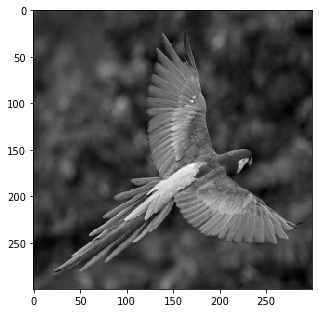

In [375]:
img1 = imageio.imread("images/arara.png")

plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin= 0, vmax=255)

In [376]:
f = np.matrix([[0,-1,0], [-1,4,-1], [0,-1,0]])
print(f)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [377]:
f_flip = np.flip(np.flip(f,0),1)
print(f_flip)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [378]:
img2 = convolution(img1, f)
print(img2)

[[ 0  0  0]
 [ 0 67 66]
 [ 0 66 65]]
1
1
[[136  68  66 ...  82  78 135]
 [ 67   2 253 ...   4 252  55]
 [ 66   4 255 ...   1   0  57]
 ...
 [ 68   1   5 ...   2   0  33]
 [ 72   2   3 ...   2 254  37]
 [145  74  72 ...  14  26  60]]


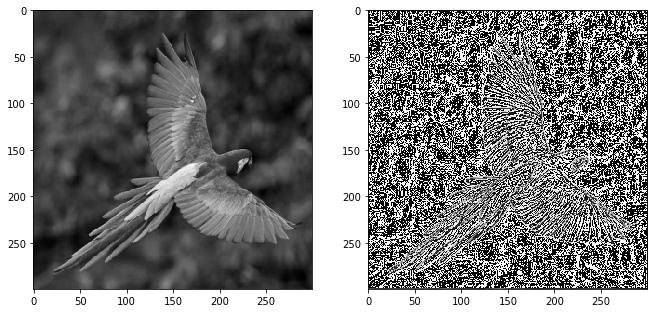

In [354]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)

In [355]:
 print((img2.astype(np.int32)).min())
print((img2.astype(np.int32)).max())
img3 = normalization(img2)


0
255


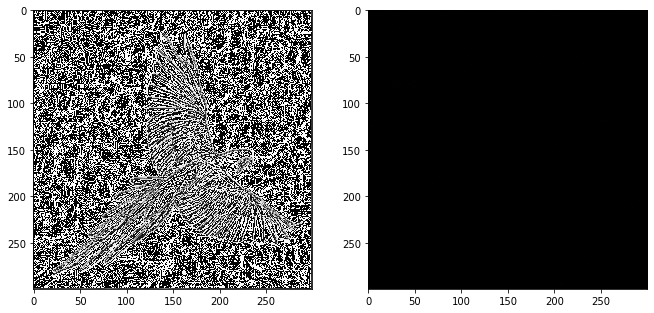

In [356]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)

In [357]:
img4 =((img3*0.5) + img1)

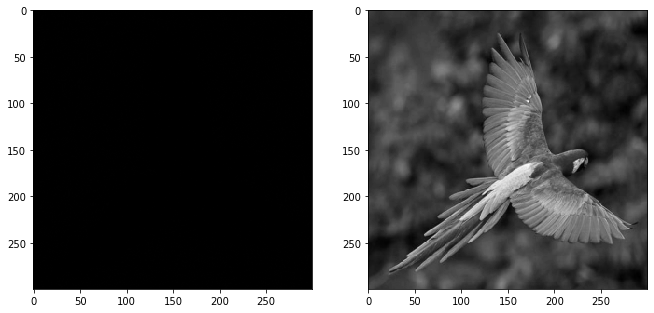

In [358]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255)

In [359]:
img_fim = normalization(img4)

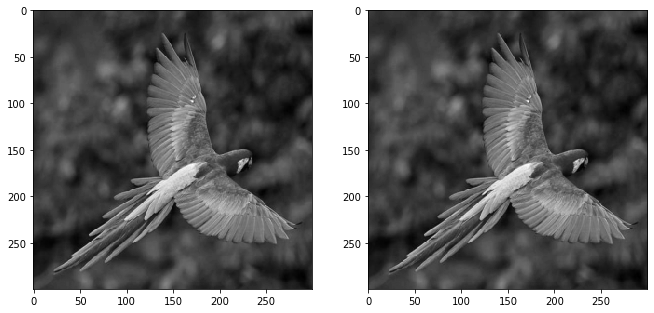

In [360]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img_fim, cmap="gray", vmin=0, vmax=255)

In [361]:
rse(img1, img_fim.astype(np.uint8))

219.58825105182655